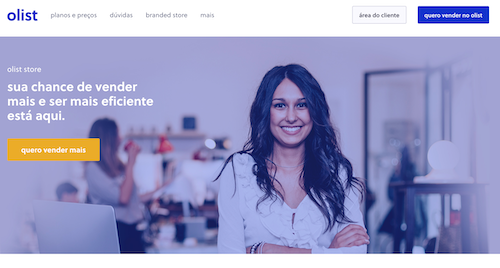

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import geopandas
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Contexte




# Objectifs


Chargez les fichiers `olist_customers_dataset, olist_order_items_dataset, olist_geolocation_dataset, olist_sellers_dataset, olist_products_dataset, olist_orders_dataset, olist_order_reviews_dataset, olist_order_payments_dataset, product_category_name_translation` à l'aide de Pandas. Stockez les résultats du chargement dans une variable.

# Données

In [2]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_product_category_name_translation = pd.read_csv(
    'product_category_name_translation.csv')

In [3]:
noms_df = ['df_sellers',
           'df_customers',
           'df_orders',
           'df_order_items',
           'df_products',
           'df_product_category_name_translation',
           'df_order_payments',
           'df_geolocation']

liste_df = [df_sellers,
            df_customers,
            df_orders,
            df_order_items,
            df_products,
            df_product_category_name_translation,
            df_order_payments,
            df_geolocation]

In [4]:
i = 0
for df in liste_df:
    print("**** Nom du fichier: ", noms_df[i])
    print("************************************")
    i = i + 1
    print("Variables    : ", df.columns)
    print("Nb de features : ", df.shape[1])
    print("Nb de rows   : ", df.shape[0])
    print("Doublons     : ", df.duplicated().sum())
    print("Rows vides: ", df.isna().sum().sum(), 'NaN\n')
    

**** Nom du fichier:  df_sellers
************************************
Variables    :  Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
Nb de features :  4
Nb de rows   :  3095
Doublons     :  0
Rows vides:  0 NaN

**** Nom du fichier:  df_customers
************************************
Variables    :  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Nb de features :  5
Nb de rows   :  99441
Doublons     :  0
Rows vides:  0 NaN

**** Nom du fichier:  df_orders
************************************
Variables    :  Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Nb de features :  8
Nb de rows   :  99441
Doublons     :  0
Rows vides:  4908 NaN

**** Nom du fichier:  df_order_ite

# Compréhension des données

## Geolocation

In [5]:
#df_geolocation = df_geolocation[[
#    'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

In [6]:
#df_geolocation = df_geolocation.drop_duplicates(keep='first')

In [7]:
# Create a geometry column by constructing Point objects from the lon and lat columns
#df_geolocation['geometry'] = df_geolocation.apply(lambda row: Point(row['geolocation_lng'], row['geolocation_lat']), axis=1)

In [8]:
# Create a GeoDataFrame from the DataFrame
#df_geolocation = gpd.GeoDataFrame(df_geolocation, geometry='geometry')

In [9]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#fig, ax = plt.subplots()
#world.plot(ax=ax, color='white', edgecolor='black')
#df_geolocation.plot(ax=ax, column = "geometry")
#fig.set_size_inches(18, 10)
#plt.show()

### Brazil

Coordonnées du Brésil
* 5°16'20" Nord à 33°44'32" Sud de latitude
* 34°47'30" Ouest à 73°59'32" Ouest de longitude

In [10]:
# Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude
df_geolocation = df_geolocation[df_geolocation.geolocation_lat <= 5.1620]

# It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude
df_geolocation = df_geolocation[df_geolocation.geolocation_lat >= -33.4432]

# it’s most Western spot is at 73 deg, 58′ 58.19″W Long
df_geolocation = df_geolocation[df_geolocation.geolocation_lng >= -73.5932]

# It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
df_geolocation = df_geolocation[df_geolocation.geolocation_lng <= -34.4730]

In [11]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#south_america = world[(world.continent == 'South America')]
#fig, ax = plt.subplots()
#south_america.plot(ax=ax, color='white', edgecolor='black')
#df_geolocation.plot(ax=ax, column = "geometry")
#fig.set_size_inches(18, 10)
#plt.show()

In [12]:
#df_geolocation.head(3)

In [13]:
#df_geolocation.drop(['geolocation_lat', 'geolocation_lng'],axis=1,inplace=True)

In [14]:
#df_geolocation.to_csv('olist_geolocation_geometry.csv', index=False, header=True)

In [15]:
df_geo = pd.read_csv('olist_geolocation_geometry.csv')

In [16]:
# list zip_code_prefix  in brazil
brazil_zip_code = df_geo['geolocation_zip_code_prefix'].value_counts(
).index.tolist()

## Customers

In [17]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [19]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [20]:
df_customers.shape

(99441, 5)

### Customers city

In [21]:
print(f"Il y a un total de {len(df_customers['customer_city'].value_counts())} de villes clients")

Il y a un total de 4119 de villes clients


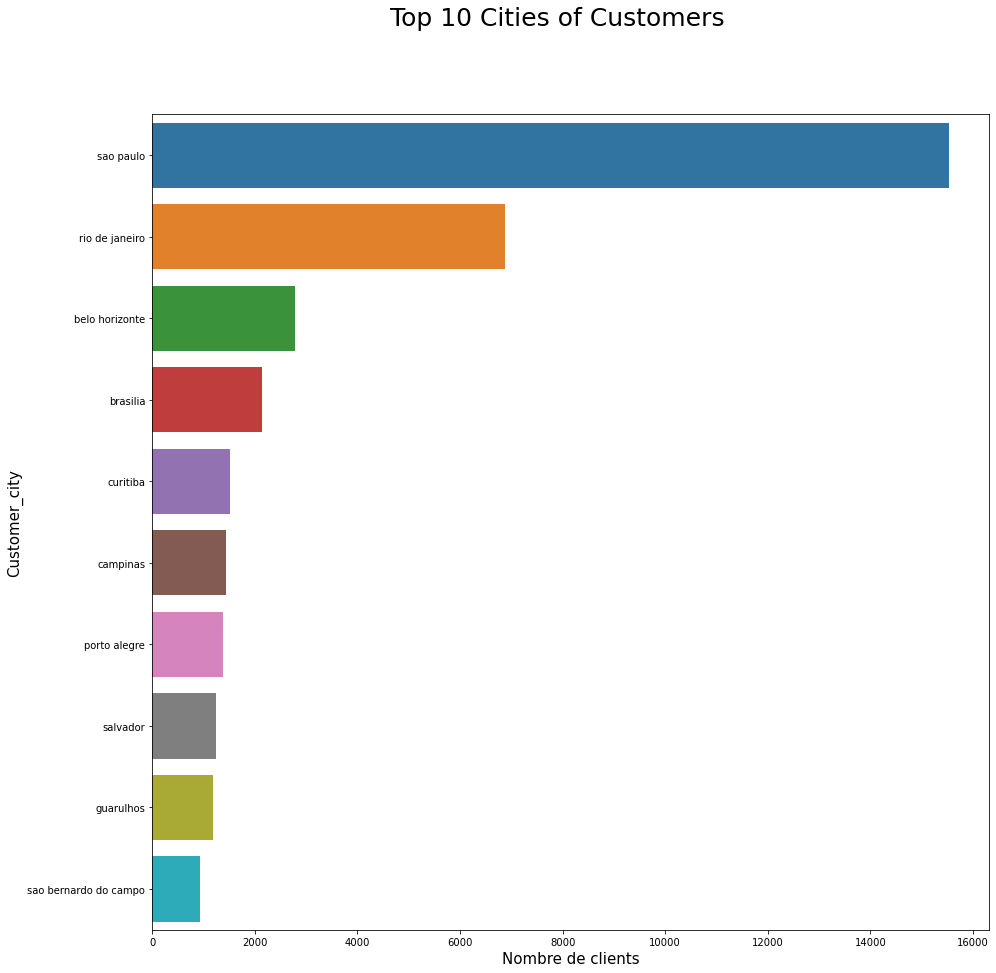

In [22]:
plt.figure(figsize=(15, 15))
sns.countplot(y=df_customers['customer_city'], data=df_customers,
              order=df_customers['customer_city'].value_counts().iloc[:10].index)
plt.suptitle("Top 10 Cities of Customers", fontsize=25)
plt.xlabel("Nombre de clients", fontsize=15)
plt.ylabel('Customer_city', fontsize=15)
plt.show()

prédominance des clients de Sao Paulo

### Customer_state

In [23]:
print(f"Il y a un total de {len(df_customers['customer_state'].value_counts())} d'Etat clients")

Il y a un total de 27 d'Etat clients


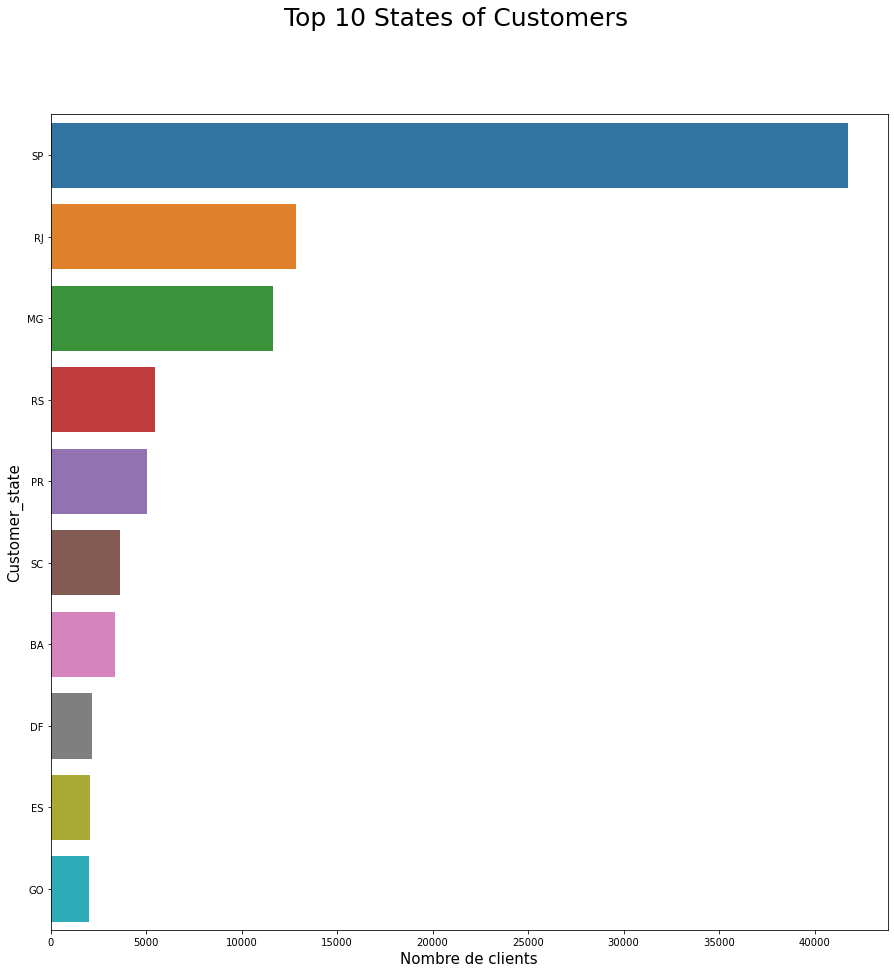

In [24]:
plt.figure(figsize=(15, 15))
sns.countplot(y=df_customers['customer_state'], data=df_customers,
              order=df_customers['customer_state'].value_counts().iloc[:10].index)
plt.suptitle("Top 10 States of Customers", fontsize=25)
plt.xlabel("Nombre de clients", fontsize=15)
plt.ylabel('Customer_state', fontsize=15)
plt.show()

prédominance des clients de SP

### Geolocalisation Brazil

In [25]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [26]:
# rename
df_customers=df_customers.rename(columns = {'customer_zip_code_prefix':'geolocation_zip_code_prefix'})

In [27]:
# isin brazil zip code
df_customers = df_customers[df_customers['geolocation_zip_code_prefix'].isin(
    brazil_zip_code)]

In [28]:
df_customers.nunique()

customer_id                    99157
customer_unique_id             95823
geolocation_zip_code_prefix    14835
customer_city                   4072
customer_state                    27
dtype: int64

### zip_code_prefix  in brazil

In [29]:
# list zip_code_prefix  in brazil
brazil_customer = df_customers['customer_id'].value_counts(
).index.tolist()

## Orders

In [30]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [31]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,17389ecc18ada2b3cc49b0fbc2100079,a6539a023af66941ded3f5f9a6bdf0b0,delivered,2017-11-20 11:46:30,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [32]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### To datetime

In [33]:
# To datetime au lieu d'object
df_orders.order_purchase_timestamp  = pd.to_datetime(df_orders.order_purchase_timestamp)

# To datetime au lieu d'object
df_orders.order_approved_at  = pd.to_datetime(df_orders.order_approved_at)

# To datetime au lieu d'object
df_orders.order_delivered_carrier_date  = pd.to_datetime(df_orders.order_delivered_carrier_date)

# To datetime au lieu d'object
df_orders.order_delivered_customer_date  = pd.to_datetime(df_orders.order_delivered_customer_date)

# To datetime au lieu d'object
df_orders.order_estimated_delivery_date   = pd.to_datetime(df_orders.order_estimated_delivery_date )

### Order_status	

In [34]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [35]:
df_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

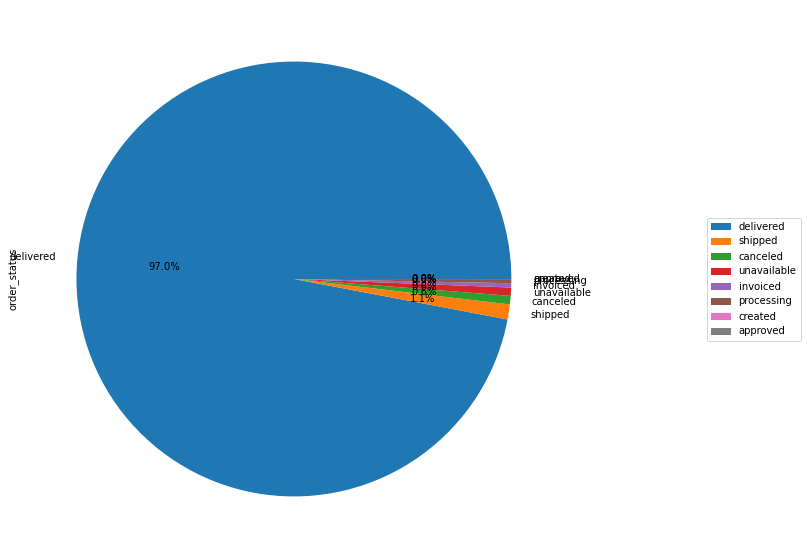

In [36]:
counts = df_orders['order_status'].value_counts()
fig, ax = plt.subplots()
ax = counts.plot.pie(autopct='%.1f%%', legend=None)
ax.legend(labels=counts.index, loc='center left', bbox_to_anchor=(1.25, 0.5))
fig.set_size_inches(18, 10)
plt.show()

Assurons nous de garder uniquement order_status **delivered** pour la suite de notre étude

In [37]:
#Filtre sur delivered
df_orders = df_orders[df_orders['order_status'] == 'delivered']

### Order_delivery_date 
vérification des données
* df_orders['order_delivered_customer_date'] < df_orders['order_delivered_carrier_date']

In [38]:
df_orders.loc[(df_orders['order_delivered_customer_date'] < df_orders['order_delivered_carrier_date']), [
    'order_id', 'order_delivered_customer_date', 'order_delivered_carrier_date']]

,order_id,order_delivered_customer_date,order_delivered_carrier_date
6437,a1abeb653a4d4cd1e142ccb8c82cd069,2017-07-25 19:32:56,2017-07-28 16:57:58
9553,383aa8b2724fe452d9ccd9934a8c628b,2017-07-06 14:27:51,2017-07-07 17:22:41
13487,cb1134f9010d242e9515ad1c78ec0c39,2017-07-19 14:13:28,2017-07-20 19:22:02
14474,dceb62e8fa94b46006c9554fed743df0,2017-07-26 18:09:10,2017-08-01 18:23:30
19268,5f9d46795c3126674e52becb3a1a517f,2017-07-20 18:52:41,2017-07-20 23:03:42
21338,8c78d01de3a9009e23d6877a7cc9be20,2016-10-25 17:51:46,2016-10-26 11:41:53
22520,b27af682321527a6349f1761eb3f360c,2017-06-26 15:45:35,2017-06-27 14:51:54
25393,1cc3ae63caffff2d6c3ee3e78e074acf,2017-08-10 18:05:38,2017-08-10 18:28:56
25646,e37f11cae9985ca58f0b56f268720537,2017-07-31 17:49:56,2017-08-01 18:17:47
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,2017-08-01 21:13:01,2017-08-09 18:18:43


In [39]:
# On élimine ces données abérantes
df_orders = df_orders.loc[(df_orders['order_delivered_customer_date']
                           >= df_orders['order_delivered_carrier_date'])]

* df_orders['order_delivered_customer_date'] < df_orders['order_approved_at']

In [40]:
df_orders.loc[(df_orders['order_delivered_customer_date'] < df_orders['order_approved_at']), [
    'order_id', 'order_delivered_customer_date', 'order_approved_at']]

,order_id,order_delivered_customer_date,order_approved_at
199,58d4c4747ee059eeeb865b349b41f53a,2018-07-25 23:58:19,2018-07-26 23:31:53
483,4df92d82d79c3b52c7138679fa9b07fc,2018-07-27 18:55:57,2018-07-29 23:30:52
1986,6e57e23ecac1ae881286657694444267,2018-08-17 16:45:45,2018-08-20 15:55:42
3659,f222c56f035b47dfa1e069a88235d730,2018-02-01 20:10:38,2018-02-04 23:31:47
11738,cf72398d0690f841271b695bbfda82d2,2017-09-11 14:15:02,2017-09-13 22:04:39
...,...,...,...
89703,fcbf4f4ef049367f9f85af94ed3b6010,2018-04-24 14:03:28,2018-04-24 18:41:20
91801,4387477eec4b3c89b39f3f454940d059,2018-08-15 14:56:43,2018-08-20 15:56:29
93680,4f3a6e28d764cf896b1fceb0028422c8,2018-07-05 13:32:49,2018-07-05 16:21:50
94359,9c3186381b733d4304e2e416afc6bbc1,2018-08-01 19:04:37,2018-08-02 23:30:29


In [41]:
# On élimine ces données abérantes
df_orders = df_orders.loc[(df_orders['order_delivered_customer_date']
                           >= df_orders['order_approved_at'])]

* df_orders['order_delivered_carrier_date'] < df_orders['order_approved_at']

In [42]:
df_orders.loc[(df_orders['order_delivered_carrier_date'] < df_orders['order_approved_at']), [
    'order_id', 'order_delivered_carrier_date', 'order_approved_at']]

,order_id,order_delivered_carrier_date,order_approved_at
15,dcb36b511fcac050b97cd5c05de84dc3,2018-06-11 14:54:00,2018-06-12 23:31:02
64,688052146432ef8253587b930b01a06d,2018-04-23 19:19:14,2018-04-24 18:25:22
210,412fccb2b44a99b36714bca3fef8ad7b,2018-07-23 12:24:00,2018-07-23 12:31:53
415,56a4ac10a4a8f2ba7693523bb439eede,2018-07-24 14:03:00,2018-07-27 23:31:09
481,32e4fa9bb468884309b58b9348de70c3,2018-07-05 14:50:00,2018-07-05 16:33:06
...,...,...,...
99091,240ead1a7284667e0ec71d01f80e4d5e,2018-07-05 14:11:00,2018-07-05 16:17:59
99230,78008d03bd8ef7fcf1568728b316553c,2018-07-03 12:57:00,2018-07-05 16:32:52
99266,76a948cd55bf22799753720d4545dd2d,2018-01-31 18:11:58,2018-02-04 23:31:46
99377,a6bd1f93b7ff72cc348ca07f38ec4bee,2018-04-23 17:18:40,2018-04-24 19:26:10


In [43]:
# On élimine ces données abérantes
df_orders = df_orders.loc[(df_orders['order_delivered_carrier_date']
                           >= df_orders['order_approved_at'])]

* df_orders['order_estimated_delivery_date'] < df_orders['order_delivered_carrier_date'])

In [44]:
df_orders.loc[(df_orders['order_estimated_delivery_date'] < df_orders['order_delivered_carrier_date']), [
    'order_id', 'order_estimated_delivery_date', 'order_delivered_carrier_date']]

,order_id,order_estimated_delivery_date,order_delivered_carrier_date
20,203096f03d82e0dffbc41ebc2e2bcfb7,2017-09-28,2017-10-06 17:50:03
102,a5474c0071dd5d1074e12d417078bbd0,2018-08-02,2018-08-02 10:35:00
711,234c056c50619f48da64f731c48242b4,2018-08-23,2018-08-31 15:25:00
755,4190ab61a7fced69f3ee84d1da1120cc,2018-01-11,2018-01-12 00:35:33
757,a06c43ed81f5c604287461f4d21949ce,2017-11-17,2017-11-20 21:15:00
...,...,...,...
98248,f6ac44bbece0129b596dfc21aede3c20,2018-08-14,2018-08-20 12:25:00
98368,874a7690bc049bd4ce210d195bdfff7b,2018-08-08,2018-08-10 14:42:00
98418,cfb601982b3ff65c1821561ec49625bd,2017-07-11,2017-07-13 14:41:35
98844,954ab5c4577503f15b807007b0a1d8cc,2018-04-02,2018-04-03 16:48:35


In [45]:
# On élimine ces données abérantes
df_orders = df_orders.loc[(df_orders['order_estimated_delivery_date']
                           >= df_orders['order_delivered_carrier_date'])]

In [46]:
df_orders.nunique()

order_id                         94618
customer_id                      94618
order_status                         1
order_purchase_timestamp         94117
order_approved_at                86917
order_delivered_carrier_date     78903
order_delivered_customer_date    93833
order_estimated_delivery_date      444
dtype: int64

### Id_customer in Brazil
Those who is in df_customers

In [47]:
# isin customers brazil 
df_orders = df_orders[df_orders['customer_id'].isin(
    brazil_customer)]

In [48]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94353 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94353 non-null  object        
 1   customer_id                    94353 non-null  object        
 2   order_status                   94353 non-null  object        
 3   order_purchase_timestamp       94353 non-null  datetime64[ns]
 4   order_approved_at              94353 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94353 non-null  datetime64[ns]
 6   order_delivered_customer_date  94353 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94353 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.5+ MB


In [49]:
df_orders.drop(['order_status'],axis=1,inplace=True)

### order_id list

In [50]:
# list order_id in order
order_id_customer = df_orders['order_id'].value_counts(
).index.tolist()

## Items

In [51]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [52]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [53]:
df_order_items.shape

(112650, 7)

In [54]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [55]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

### shipping_limit_date To datetime
date limite d'expédition

In [56]:
# To datetime au lieu d'object
df_order_items.shipping_limit_date  = pd.to_datetime(df_order_items.shipping_limit_date)

In [57]:
# Set_index
df_order_items = df_order_items.set_index(
    'shipping_limit_date')

# création d'une nouvelle feature avec l'année
df_order_items['ANNEE'] = df_order_items.index.year

# création d'une nouvelle feature avec le nom du mois
df_order_items['MOIS'] = df_order_items.index.month_name()

# création d'une nouvelle feature avec le nom du jour
df_order_items['JOUR'] = df_order_items.index.day_name()

### Price   

In [58]:
df_order_items["price"].min()

0.85

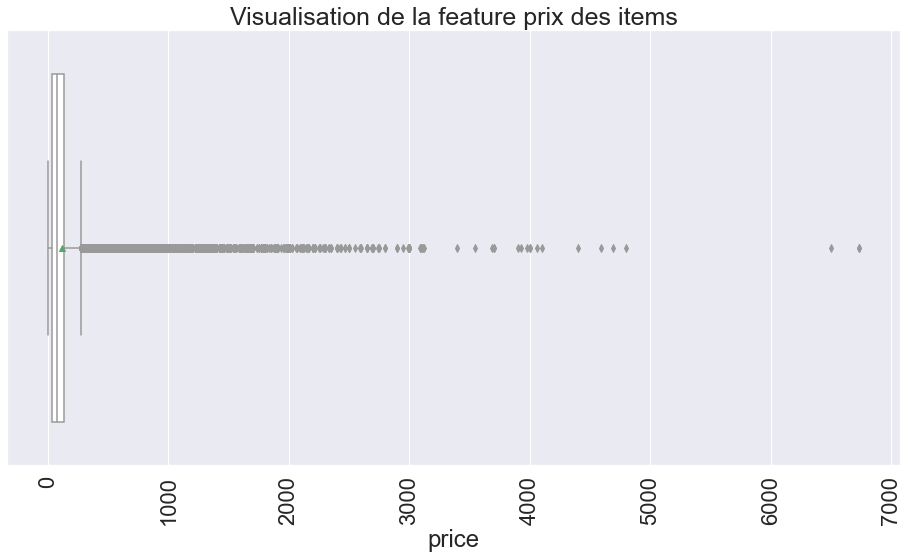

In [59]:
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x=df_order_items["price"],
            data=df_order_items, showmeans=True, color='white')
plt.title("Visualisation de la feature prix des items", fontsize=25)
plt.xticks(rotation='90')
plt.show()

In [60]:
#CA data
df_CA = df_order_items['price'].resample("M").sum()

#dataframe
df_CA = pd.DataFrame(df_CA)

# rename columns
df_CA.columns = ['CA']

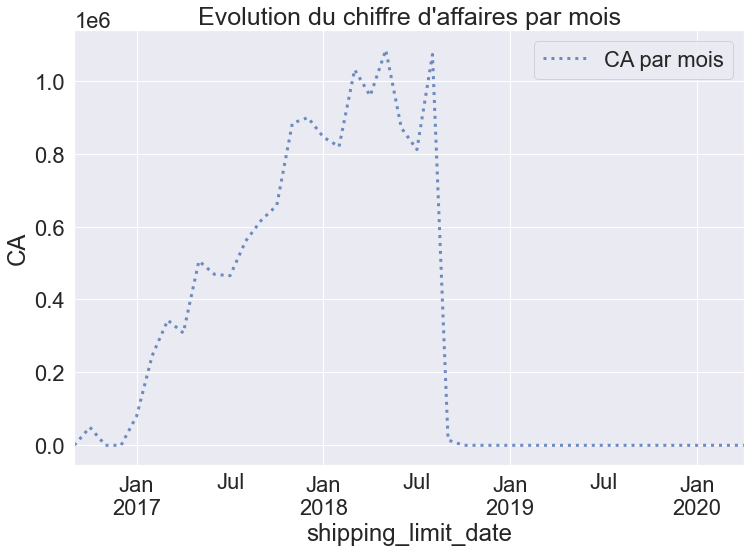

In [61]:
plt.figure(figsize=(12, 8))
df_order_items['price'].resample('M').sum().plot(
    label='CA par mois', lw=3, ls=':', alpha=0.8)
plt.ylabel("CA")
plt.title("Evolution du chiffre d'affaires par mois", fontsize=25)
plt.legend()
plt.show()

In [62]:
# Calcul du CA total
CA_total = df_order_items["price"].sum()

# Affichage CA  total avec la fonction print()
print(
    f'Le chiffre d’affaires total réalisé est de : {round(CA_total ,2)} euros')

Le chiffre d’affaires total réalisé est de : 13591643.7 euros


In [63]:
CA_2016 = df_order_items['price'].resample("Y").sum()[0]
CA_2017 = df_order_items['price'].resample("Y").sum()[1]
CA_2018 = df_order_items['price'].resample("Y").sum()[2]
CA_2019 = df_order_items['price'].resample("Y").sum()[3]
CA_2020 = df_order_items['price'].resample("Y").sum()[4]

In [109]:
# Affichage CA / annéé avec la fonction print()
print(
    f'Le chiffre d’affaires total réalisé en 2016 est de : {round(CA_2016 ,2)} euros')

print(
    f'Le chiffre d’affaires total réalisé en 2017 est de : {round(CA_2017,2)} euros')

print(
    f'Le chiffre d’affaires total réalisé en 2018 est de : {round(CA_2018 ,2)} euros')

print(
    f'Le chiffre d’affaires total réalisé en 2019 est de : {round(CA_2019 ,2)} euros')

print(
    f'Le chiffre d’affaires total réalisé en 2020 est de : {round(CA_2020 ,2)} euros')

Le chiffre d’affaires total réalisé en 2016 est de : 49785.92 euros
Le chiffre d’affaires total réalisé en 2017 est de : 6034868.58 euros
Le chiffre d’affaires total réalisé en 2018 est de : 7506643.24 euros
Le chiffre d’affaires total réalisé en 2019 est de : 0.0 euros
Le chiffre d’affaires total réalisé en 2020 est de : 345.96 euros


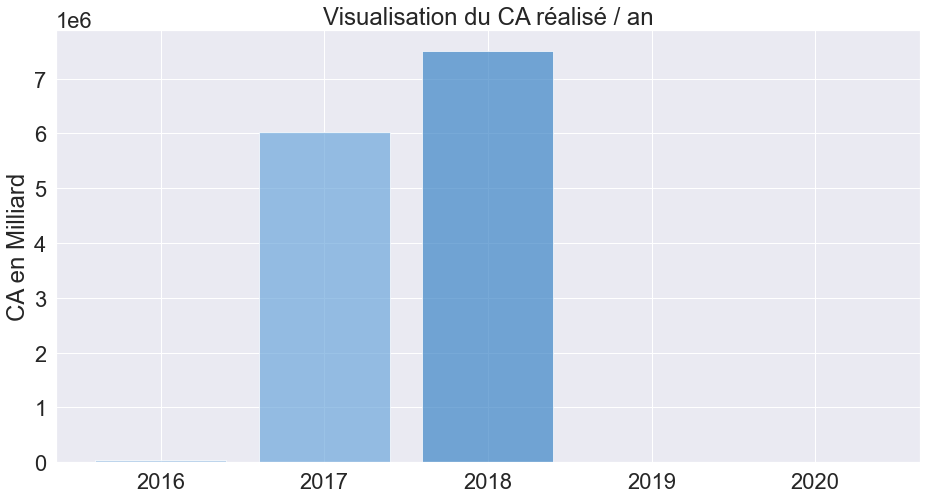

In [64]:
# visualisation avec barplot de matplotlib
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])
labels = '2016', '2017', '2018', '2019', '2020'
data = [CA_2016, CA_2017, CA_2018, CA_2019, CA_2020]

ax.bar(labels, data, color=['#9fc5e8', '#6fa8dc', '#3d85c6','#9fc5e8', '#6fa8dc'], alpha=0.7)
ax.set_title('Visualisation du CA réalisé / an')
ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel('CA en Milliard')
plt.show()

### Freight_value  
valeur du fret

In [65]:
df_order_items["freight_value"].min()

0.0

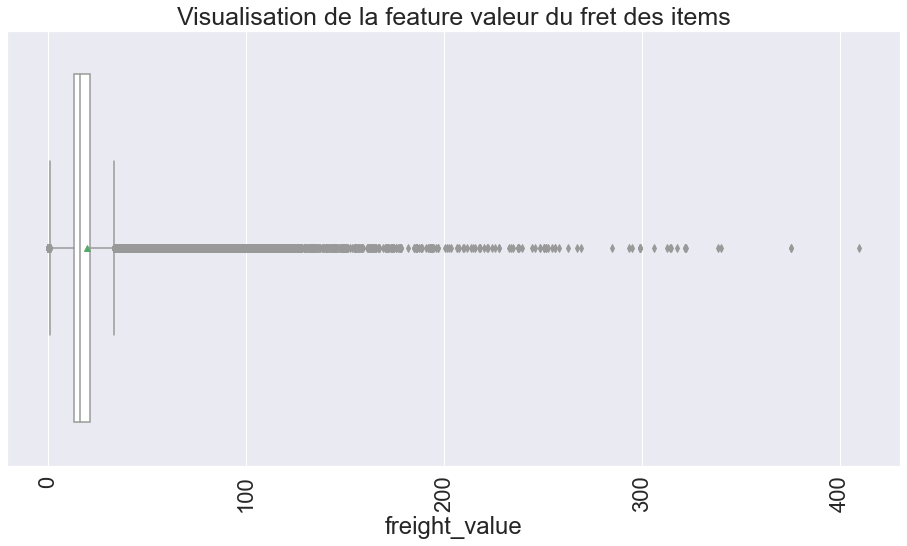

In [66]:
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x=df_order_items["freight_value"],
            data=df_order_items, showmeans=True, color='white')
plt.title("Visualisation de la feature valeur du fret des items", fontsize=25)
plt.xticks(rotation='90')
plt.show()

In [67]:
#fret data
df_fret = df_order_items['freight_value'].resample("M").sum()

#dataframe
df_fret = pd.DataFrame(df_CA)

# rename columns
df_fret.columns = ['Depense']

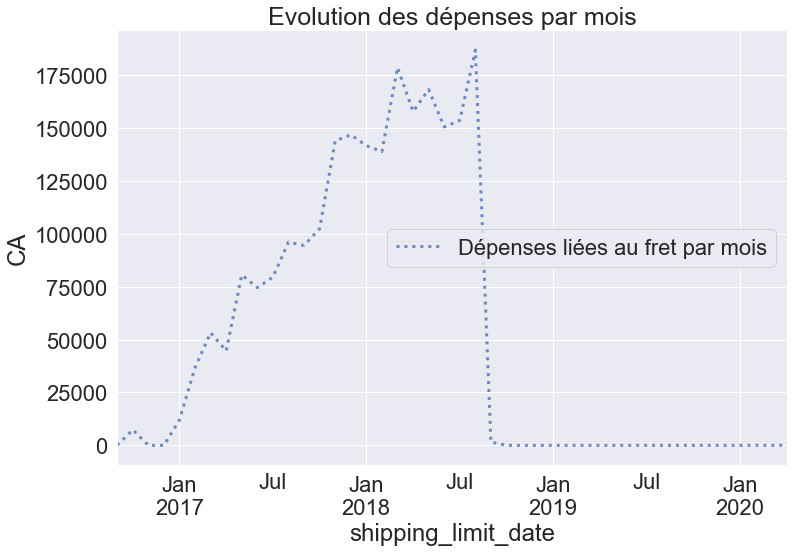

In [103]:
plt.figure(figsize=(12, 8))
df_order_items['freight_value'].resample('M').sum().plot(
    label='Dépenses liées au fret par mois', lw=3, ls=':', alpha=0.8)
plt.ylabel("CA")
plt.title("Evolution des dépenses par mois", fontsize=25)
plt.legend()
plt.show()

In [69]:
Dépenses_2016 = df_order_items['freight_value'].resample("Y").sum()[0]
Dépenses_2017 = df_order_items['freight_value'].resample("Y").sum()[1]
Dépenses_2018 = df_order_items['freight_value'].resample("Y").sum()[2]
Dépenses_2019 = df_order_items['freight_value'].resample("Y").sum()[3]
Dépenses_2020 = df_order_items['freight_value'].resample("Y").sum()[4]

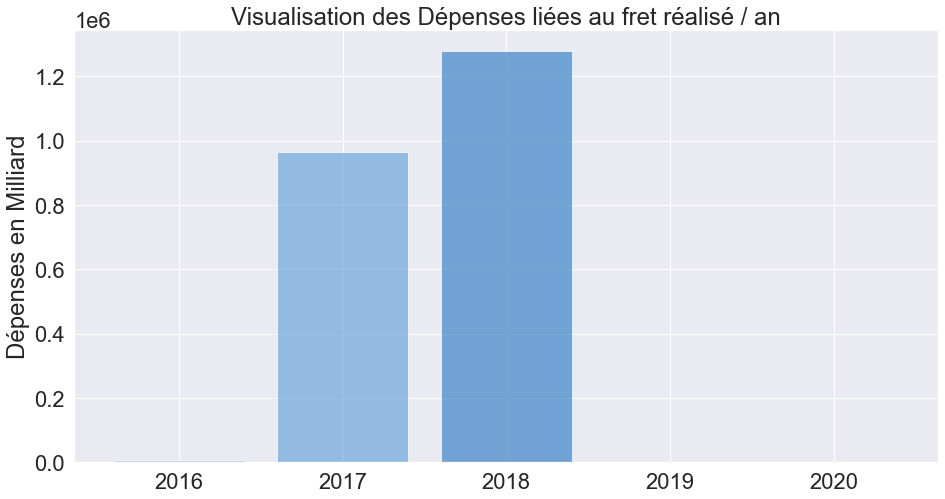

In [70]:
# visualisation avec barplot de matplotlib
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])
labels = '2016', '2017', '2018', '2019', '2020'
data = [Dépenses_2016, Dépenses_2017, Dépenses_2018, Dépenses_2019, Dépenses_2020]

ax.bar(labels, data, color=['#9fc5e8', '#6fa8dc', '#3d85c6','#9fc5e8', '#6fa8dc'], alpha=0.7)
ax.set_title('Visualisation des Dépenses liées au fret réalisé / an')
ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel('Dépenses en Milliard')
plt.show()

In [71]:
# Calcul du dépense lié au fret
Depense_totale = df_order_items["freight_value"].sum()

# Affichage CA  total avec la fonction print()
print(
    f'La Dépense totale liée au fret est de : {round(Depense_totale ,2)} euros')

La Dépense totale liée au fret est de : 2251909.54 euros


### Price - Freight value

In [72]:
# Calcul du Bénéfice
Benefice = CA_total - Depense_totale

# Affichage CA  total avec la fonction print()
print(
    f'Le Bénéfice est de : {round(Benefice ,2)} euros')

Le Bénéfice est de : 11339734.16 euros


In [73]:
df_order_items = df_order_items.assign(benefice=lambda x: (x['price'] -
               x['freight_value']))

In [75]:
df_order_items

,order_id,order_item_id,product_id,seller_id,price,freight_value,ANNEE,MOIS,JOUR,benefice
shipping_limit_date,,,,,,,,,,
2017-09-19 09:45:35,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017,September,Tuesday,45.61
2017-05-03 11:05:13,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017,May,Wednesday,219.97
2018-01-18 14:48:30,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018,January,Thursday,181.13
2018-08-15 10:10:18,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018,August,Wednesday,0.20
2017-02-13 13:57:51,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017,February,Monday,181.76
...,...,...,...,...,...,...,...,...,...,...
2018-05-02 04:11:01,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018,May,Wednesday,256.58
2018-07-20 04:31:48,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018,July,Friday,313.47
2017-10-30 17:14:25,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017,October,Monday,82.95


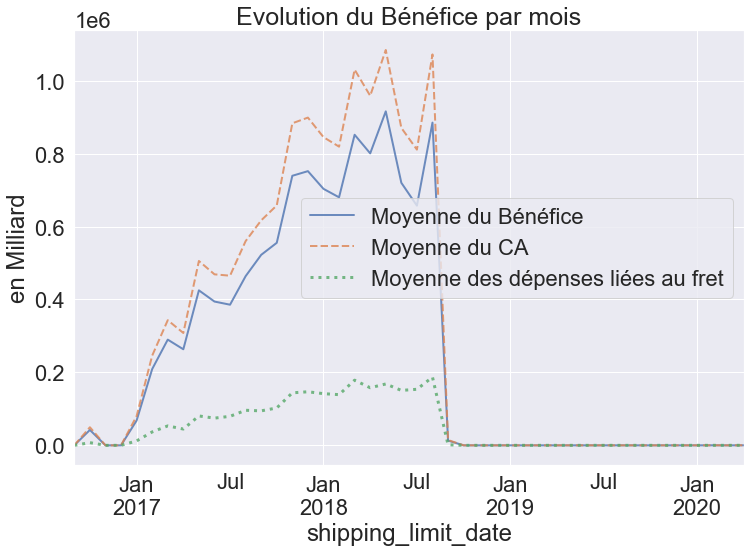

In [82]:
plt.figure(figsize=(12, 8))
df_order_items['benefice'].resample('M').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items['price'].resample('M').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items['freight_value'].resample('M').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

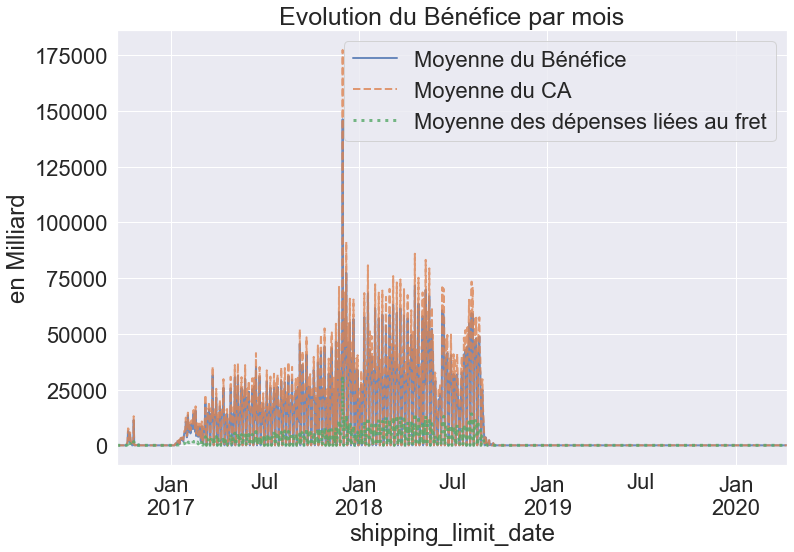

In [83]:
plt.figure(figsize=(12, 8))
df_order_items['benefice'].resample('D').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items['price'].resample('D').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items['freight_value'].resample('D').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

### Date time Selection

Nous pouvons observer une très forte évolution du CA fin novembre 2017,Nous analyserons plus précisément par la suite les clients, les produits.
Pour le reste de notre étude, nous analyserons les donnéesuniquement entre 

In [98]:
# Visulation resample Jour du 29 septembre au 29 octobre 2021
df_order_items_loc_22_nov_22_dec_2017 = df_order_items.loc[
    '2017-11-22':'2017-12-22']

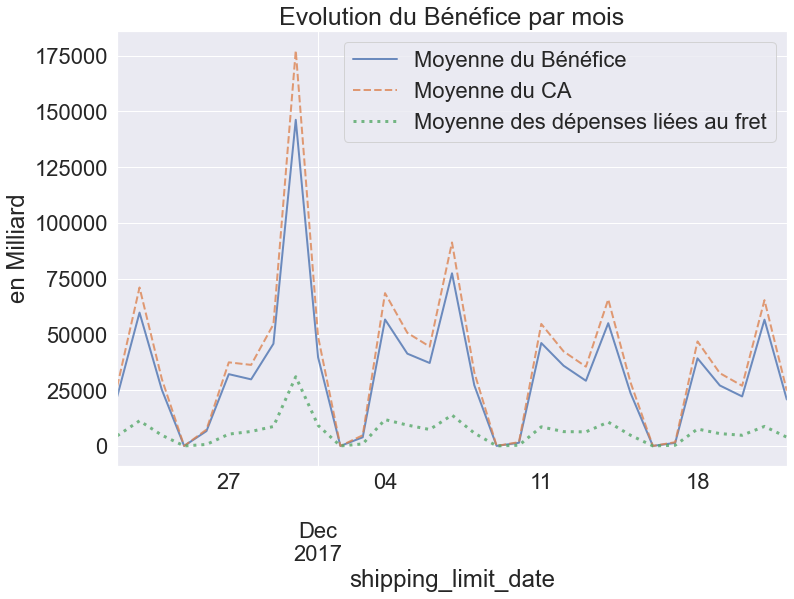

In [99]:
plt.figure(figsize=(12, 8))
df_order_items_loc_22_nov_22_dec_2017['benefice'].resample('D').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items_loc_22_nov_22_dec_2017['price'].resample('D').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items_loc_22_nov_22_dec_2017['freight_value'].resample('D').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

In [100]:
df_orders.order_estimated_delivery_date.min()

Timestamp('2016-10-27 00:00:00')

In [101]:
df_orders.order_estimated_delivery_date.max()

Timestamp('2018-10-25 00:00:00')

### order_item_id

In [ ]:
df_order_items['order_item_id'].value_counts()

In [ ]:
counts = df_order_items['order_item_id'].value_counts()
fig, ax = plt.subplots()
ax = counts.plot.pie(autopct='%.1f%%', legend=None)
fig.set_size_inches(18, 10)
plt.show()

### Order Id in Items

In [ ]:
# isin customers brazil 
df_order_items[df_order_items['order_id'].isin(
    order_id_customer)]

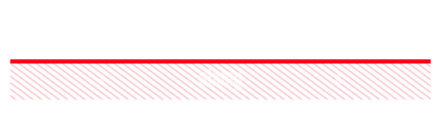

In [ ]:
df_order_reviews.head()

In [ ]:
df_order_reviews.describe()

In [ ]:
df_order_reviews.shape

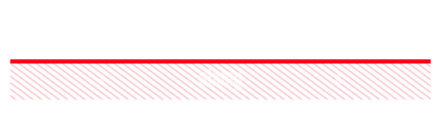

In [ ]:
df_order_payments.head()

In [ ]:
df_order_payments.describe()

In [ ]:
df_order_payments.shape

## products

In [ ]:
df_products.head()

In [ ]:
df_products.describe()

In [ ]:
df_products.shape

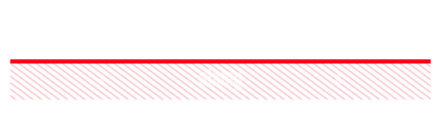

In [ ]:
df_product_category_name_translation.head()

In [ ]:
df_product_category_name_translation.describe()

In [ ]:
df_product_category_name_translation.shape

## sellers

In [ ]:
df_sellers.head()

In [ ]:
df_sellers.describe()

In [ ]:
df_sellers.shape

## geolocation

In [ ]:
df_geolocation.head()

In [ ]:
df_geolocation.describe()

In [ ]:
df_geolocation.shape

# Regroupement des dataframes

## Orders

On stock l'ID orders pour nos filtres à venir

In [ ]:
id_orders_valide = df_orders['order_id'].value_counts(
).index.tolist()

## Order payments

In [ ]:
df_order_payments.nunique()

### Payment_sequential

In a sequential pay CMO, each tranche receives interest payments as long as the tranche's principal amount has not been completely paid off. However, the principal payments are received solely by the most senior tranche until it is completely paid off. Once the initial principal payments have been retired, the next most senior tranche receives all the principal payments. The retirement of tranches continues in order of seniority until the entire CMO has been retired. A sequential pay CMO is also known as a plain vanilla CMO.

In [ ]:
df_order_payments['payment_sequential'].value_counts()

### Payment_installments

"Payment_installments" pour un site de e-commerce fait référence à la possibilité pour les utilisateurs de payer leur achat en plusieurs versements plutôt qu'en un seul paiement. Cela permet aux utilisateurs de diviser le coût total de leur achat en plusieurs paiements plus petits, répartis sur une période de temps déterminée. Il peut s'agir d'un paiement mensuel ou d'autres types de fréquences. 

In [ ]:
df_order_payments['payment_installments'].value_counts()

In [ ]:
df_orders['order_id'].nunique()

In [ ]:
df_order_payments['order_id'].nunique()

In [ ]:
df_order_items['order_id'].nunique()

In [ ]:
df_order_reviews['order_id'].nunique()

Procédons en 4 étapes pour les df_orders
* regroupement df_orders et df_order_payments
* regroupement df_orders_payments et df_order_items
* regroupement df_orders_payments_items et df_order_reviews
* Obtenir df_orders_payments_items_reviews 

### Regroupement df_orders et df_order_payments

In [ ]:
cols_order_payments = set(df_order_payments.columns)

cols_inter = cols_order_payments.intersection(set(df_orders.columns))

print(cols_inter)

In [ ]:
df_order_payments['payment_type'].value_counts()

#### payment_type

In [ ]:
type_payment = ['credit_card',
                'boleto',
                'voucher',
                'debit_card']

In [ ]:
#df_order_payments = df_order_payments[df_order_payments['payment_type'].isin(
#    type_payment) == True]

In [ ]:
df_order_payments = df_order_payments[df_order_payments['order_id'].isin(
    id_orders_valide)]

In [ ]:
df_order_payments['order_id'].value_counts(ascending=False)

In [ ]:
df_order_payments['order_id'].nunique()

In [ ]:
df_orders_payments_merge = pd.merge(
    df_orders, df_order_payments, on='order_id', how='left')

In [ ]:
df_orders_payments_merge.isna().sum()

In [ ]:
#customer_id= 86dc2ffce2dfff336de2f386a786e574 il faudra pousser la recherche de ce client, peut etre examiner ces autres commandes 

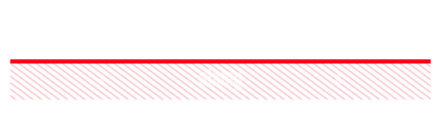

###  Regroupement df_orders_payments et df_order_items

In [ ]:
cols_order_items = set(df_order_items.columns)

cols_inter = cols_order_items.intersection(set(df_orders_payments_merge.columns))

print(cols_inter)

In [ ]:
df_order_items = df_order_items[df_order_items['order_id'].isin(
    id_orders_valide)]

In [ ]:
df_order_items['order_id'].value_counts(ascending=False)

In [ ]:
df_order_items['order_id'].nunique()

In [ ]:
df_orders_payments_merge['order_id'].nunique()

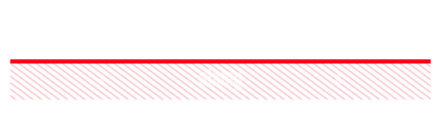

### Delta  df_order_items et df_orders

In [ ]:
id_order_items = df_order_items['order_id'].value_counts(
).index.tolist()

In [ ]:
df_is_not_order_items = df_orders_payments_merge[df_orders_payments_merge['order_id'].isin(
    id_order_items)==False]

In [ ]:
df_is_not_order_items['order_id'].value_counts(ascending=False)

In [ ]:
new_rows = [{'order_id': 'dba5062fbda3af4fb6c33b1e040ca38f'},
            {'order_id': '7a4df5d8cff4090e541401a20a22bb80'},
            {'order_id': 'e04f1da1f48bf2bbffcf57b9824f76e1'},
            {'order_id': '35de4050331c6c644cddc86f4f2d0d64'},
            {'order_id': '2ce9683175cdab7d1c95bcbb3e36f478'},
            {'order_id': 'a68ce1686d536ca72bd2dadc4b8671e5'},
            {'order_id': '90ab3e7d52544ec7bc3363c82689965f'},
            {'order_id': 'b5359909123fa03c50bdb0cfed07f098'}
            ]
df_order_items = df_order_items.append(
    new_rows, ignore_index=True)

In [ ]:
df_order_items['order_id'].nunique()

In [ ]:
df_orders_payments_merge['order_id'].nunique()

In [ ]:
df_orders_payments_items_merge = pd.merge(
    df_order_items, df_orders_payments_merge, on='order_id', how='left')

In [ ]:
df_orders_payments_items_merge.isna().sum()

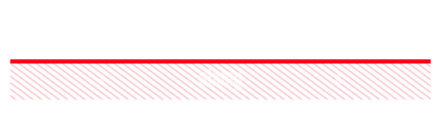

### Regroupement df_orders_payments_items et df_order_reviews

In [ ]:
cols_order_reviews = set(df_order_reviews.columns)

cols_inter = cols_order_reviews.intersection(set(df_orders_payments_items_merge.columns))

print(cols_inter)

In [ ]:
df_order_reviews = df_order_reviews[df_order_reviews['order_id'].isin(
    id_orders_valide)]

In [ ]:
df_order_reviews['order_id'].nunique()

In [ ]:
df_orders_payments_items_merge['order_id'].nunique()

nous pouvons faire la jointure à gauche des deux dataframes

In [ ]:
df_orders_payments_items_reviews_merge = pd.merge(
    df_orders_payments_items_merge, df_order_reviews, on='order_id', how='left')

In [ ]:
df_orders_payments_items_reviews_merge.isna().sum()

Nous avons maintenant un seul fichier csv contenant l'ensemble des informations orders

In [ ]:
df_orders = df_orders_payments_items_reviews_merge

## Products

In [ ]:
cols_product_category_name_translation = set(df_product_category_name_translation.columns)

cols_inter = cols_product_category_name_translation.intersection(set(df_products.columns))

print(cols_inter)

### Delta product_category_name_translation 

In [ ]:
df_product_category_name_translation['product_category_name'].nunique()

In [ ]:
df_products['product_category_name'].nunique()

In [ ]:
product_category_name = df_product_category_name_translation['product_category_name'].value_counts(
).index.tolist()

In [ ]:
df_not_in_product_categorie = df_products[df_products['product_category_name'].isin(
    product_category_name) == False]

In [ ]:
df_not_in_product_categorie['product_category_name'].value_counts()

In [ ]:
# On ajoute ces deux product_categorie dans df_product_category_name_translation
new_rows = [{'product_category_name': 'portateis_cozinha_e_preparadores_de_alimentos'},
            {'product_category_name': 'pc_gamer'}]
df_product_category_name_translation = df_product_category_name_translation.append(
    new_rows, ignore_index=True)

In [ ]:
df_product_category_name_translation['product_category_name'].nunique()

In [ ]:
df_info_products = pd.merge(
    df_products, df_product_category_name_translation, on='product_category_name', how='left')

Nous avons maintenant un seul fichier csv contenant l'ensemble des informations produits

In [ ]:
df_info_products.head()

In [ ]:
df_info_products.isna().sum()

### Missing values Product_category_name_english

In [ ]:
# missing values et traduction
df_info_products[df_info_products['product_category_name_english'].isna()==True]

In [ ]:
df_info_products.loc[32211,'product_category_name_english'] = 'pc_gamer'
df_info_products.loc[32212,'product_category_name_english'] = 'pc_gamer'
df_info_products.loc[32213,'product_category_name_english'] = 'pc_gamer'

df_info_products.loc[32318,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32319,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32320,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32321,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32322,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32323,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32324,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32325,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32326,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_info_products.loc[32327,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'

### Drop product_category_name

In [ ]:
df_info_products.drop(['product_category_name'],axis=1,inplace=True)

In [ ]:
df_info_products.isna().sum()

### Missing values product_weight_g, product_length_cm, product_height_cm, product_width_cm                 

In [ ]:
# missing values et traduction
df_info_products[df_info_products['product_weight_g'].isna()==True]

In [ ]:
df_info_products[df_info_products['product_id'] == '09ff539a621711667c43eba6a3bd8466']

In [ ]:
# on garde cette identifiant pour calculer une moyenne des produits similaires 09ff539a621711667c43eba6a3bd8466	

In [ ]:
col_dimensions = ['product_weight_g', 'product_length_cm',
                  'product_height_cm', 'product_width_cm']

In [ ]:
df_baby = df_info_products[df_info_products['product_category_name_english']=='baby']

In [ ]:
df_others= df_info_products[df_info_products['product_category_name_english']!='baby']

In [ ]:
for col in col_dimensions:
    plt.figure(figsize=[16, 8])
    sns.set(font_scale=2)
    sns.boxplot(x=df_baby['product_category_name_english'], y=df_baby[col],
            data=df_baby, showmeans=True, color='white')
    plt.title("Visualisation de " + col, fontsize=25)
    plt.show()

In [ ]:
for col in col_dimensions:
    sns.distplot(df_baby[col])
    plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(strategy="most_frequent")
imput_data = imp.fit_transform(df_baby)

In [ ]:
df_baby= pd.DataFrame(imput_data,columns=df_info_products.columns)

In [ ]:
df_baby[df_baby['product_id'] == '09ff539a621711667c43eba6a3bd8466']

In [ ]:
df_products = pd.concat([df_others,df_baby],axis=0)

### Duplicated values

In [ ]:
duplicate_rows_products = df_products[df_products.duplicated()]
duplicate_rows_products

## Customers

nous pouvons regrouper les infos customers avec les infos orders

In [ ]:
cols_customers = set(df_customers.columns)

cols_inter = cols_customers.intersection(set(df_orders.columns))

print(cols_inter)

In [ ]:
df_customers['customer_unique_id'].nunique()

In [ ]:
df_customers['customer_id'].nunique()

In [ ]:
duplicate_rows_customers = df_customers[df_customers.duplicated()]
duplicate_rows_customers

In [ ]:
customer_unique_id = df_customers['customer_unique_id'].value_counts(
).index.tolist()

In [ ]:
df_is_not_customers = df_customers[df_customers['customer_id'].isin(customer_unique_id) == False]

In [ ]:
df_is_not_customers 

In [ ]:
df_orders['customer_id'].nunique()

In [ ]:
customers_id = df_customers['customer_id'].value_counts(
).index.tolist()

In [ ]:
df_is_not_in_orders = df_orders[df_orders['customer_id'].isin(customers_id) == False]

In [ ]:
df_is_not_in_orders

In [ ]:
customers_id = df_orders['customer_id'].value_counts(
).index.tolist()

In [ ]:
df_is_not_in_customers = df_customers[df_customers['customer_id'].isin(customers_id) == False]

In [ ]:
df_is_not_in_customers

### Observation des Id customers manquants

In [ ]:
customers_unique_id = df_is_not_in_customers['customer_unique_id'].value_counts(
).index.tolist()

In [ ]:
df_is_not_in_orders = df_orders[df_orders['customer_id'].isin(customers_unique_id) == False]

In [ ]:
df_is_not_in_orders

In [ ]:
df_orders.drop_duplicates(subset='order_id').groupby('customer_unique_id')['order_id'].count()

In [ ]:
df_info_orders_products_customers = pd.merge(
    df_customers, df_info_orders_products, on='customer_id', how='left')

In [ ]:
df_info_orders_products_customers.isna().sum()

## Sellers

nous pouvons regrouper les sellers avec les infos orders customers

In [ ]:
cols_sellers= set(df_sellers.columns)

cols_inter = cols_sellers.intersection(set(df_info_orders_products_customers.columns))

print(cols_inter)

In [ ]:
df_info_orders_products_customers_sellers = pd.merge(
    df_sellers, df_info_orders_products_customers, on='seller_id', how='left')

In [ ]:
df_info_orders_products_customers_sellers.head()

In [ ]:
df_info_orders_products_customers_sellers.info()

In [ ]:
duplicate_rows_sellers = df_info_orders_products_customers_sellers[df_info_orders_products_customers_sellers.duplicated()]
duplicate_rows_sellers

In [ ]:
duplicate_rows = df_info_orders_products_customers_sellers[df_info_orders_products_customers_sellers.duplicated(['order_id'])]
duplicate_rows

## Geolocation

In [ ]:
cols_geolocalisation = set(df_geolocation.columns)

cols_inter = cols_geolocalisation.intersection(
    set(df_info_orders_products_customers_sellers.columns))

print(cols_inter)

In [ ]:
df_geolocation.columns

In [ ]:
df_info_orders_products_customers_sellers.columns

### geolocalisation 

#### Rename zip_code_prefix

In [ ]:
dans df_info_orders_products_customers_sellers, nous allons renommer les colonnes

#### Drop duplicate

In [ ]:
datas = { 'geolocation': df_geolocation, 'orders_products_customers_sellers': df_info_orders_products_customers_sellers }
for year in datas.keys():
    data = datas[year]
    print(year, "- Nombre de doublons par OSEBuildingID :", len(data[data.duplicated(subset="OSEBuildingID")]))

In [ ]:
df_merged = pd.merge(df_geolocation, df_info_orders_products_customers_sellers, on=[
                      'geolocation_zip_code_prefix', 'seller_state'], how='inner')